## Model 
* Logistic Regression
* Decision Tree 
* Bagged Decision Tree
* Random Forest
* Gradient Boosted Trees

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV,cross_val_score
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, mean_squared_error, mean_absolute_percentage_error, accuracy_score
from sklearn.metrics import multilabel_confusion_matrix
from xgboost import XGBClassifier
from xgboost import plot_tree as plot_tree_xgb
from tensorflow.keras import utils as np_utils
from sklearn.preprocessing import LabelEncoder
from matplotlib.pylab import rcParams
from sklearn.metrics import classification_report
from sklearn.svm import SVC


sns.set_style('whitegrid') # set style for visualization
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/engineered_features.csv', encoding='utf-8')
df

SUBJECT_ID  SESSION_ID  TRIAL_ID  c_ml_min_r  c_ml_max_r  c_ml_min_l  \
0             510         413         1    0.087271    0.118247    0.087814   
1             510         413         2    0.085806    0.128396    0.040212   
2             510         413         3    0.073788    0.112735    0.049990   
3             510         413         4    0.056216    0.102832    0.086729   
4             510         413         6    0.064922    0.102404    0.000573   
...           ...         ...       ...         ...         ...         ...   
43619          93   999910373         7   -0.019602   -0.001001    0.103706   
43620          93   999910373         8    0.053761    0.060738   -0.024844   
43621          93   999910373         9    0.043214    0.068197    0.038681   
43622          93   999910373        10    0.049181    0.060193   -0.036239   
43623          93   999910373        11    0.040421    0.063093    0.012097   

       c_ml_max_l  c_ap_slope_r  c_ap_slope_l  g_ml_max1_r  ...  g_v_min_l  \
0        0.128115      0.001718      0.002493     0.072643  ...   0.796622   
1        0.083074      0.001589      0.001834     0.072360  ...   0.837006   
2        0.099952      0.001740      0.001734     0.059417  ...   0.815221   
3        0.127982      0.001919      0.001361     0.079792  ...   0.773203   
4        0.052266      0.001837      0.002049     0.059537  ...   0.820851   
...           ...           ...           ...          ...  ...        ...   
43619    0.140610      0.001320      0.001493     0.035459  ...   0.776455   
43620   -0.006204      0.001334      0.002134     0.046960  ...   0.753378   
43621    0.053585      0.001676      0.001885     0.047020  ...   0.764046   
43622   -0.007429      0.002073      0.001640     0.026953  ...   0.779464   
43623    0.026784      0.001303      0.001678     0.041747  ...   0.726231   

       g_v_max2_l   diff_v1   diff_v2  diff_ap1  diff_ap2  AGE        BMI  \
0        1.003385  0.425223  0.260852  0.096354  0.057032   47  35.538442   
1        0.999401  0.322656  0.272089  0.071507  0.056424   47  35.538442   
2        1.003578  0.298372  0.244674  0.054891  0.057072   47  35.538442   
3        1.021851  0.316671  0.290747  0.072747  0.063221   47  35.538442   
4        1.027245  0.374801  0.332217  0.116513  0.083453   47  35.538442   
...           ...       ...       ...       ...       ...  ...        ...   
43619    1.163370  0.134546  0.079414  0.046175  0.027730   53  21.651307   
43620    1.144916  0.159847  0.284077  0.038476  0.128401   53  21.651307   
43621    1.153042  0.180381  0.065231  0.071944  0.036908   53  21.651307   
43622    1.158905  0.149181  0.245195  0.031198  0.115095   53  21.651307   
43623    1.179667  0.119872  0.188585  0.054564  0.096198   53  21.651307   

       CLASS_LABEL  SPEED  
0                C      2  
1                C      2  
2                C      2  
3                C      2  
4                C      2  
...            ...    ...  
43619           HC      2  
43620           HC      2  
43621           HC      2  
43622           HC      2  
43623           HC      2  

[43624 rows x 33 columns]

In [3]:
df.isna().sum().loc[lambda x : x>0].sort_values(ascending=False)

Series([], dtype: int64)

In [4]:
df.shape

(43624, 33)

In [5]:
df.columns

Index(['SUBJECT_ID', 'SESSION_ID', 'TRIAL_ID', 'c_ml_min_r', 'c_ml_max_r',
       'c_ml_min_l', 'c_ml_max_l', 'c_ap_slope_r', 'c_ap_slope_l',
       'g_ml_max1_r', 'g_ml_min_r', 'g_ml_max2_r', 'g_ml_max1_l', 'g_ml_min_l',
       'g_ml_max2_l', 'g_ap_min_r', 'g_ap_max_r', 'g_ap_min_l', 'g_ap_max_l',
       'g_v_max1_r', 'g_v_min_r', 'g_v_max2_r', 'g_v_max1_l', 'g_v_min_l',
       'g_v_max2_l', 'diff_v1', 'diff_v2', 'diff_ap1', 'diff_ap2', 'AGE',
       'BMI', 'CLASS_LABEL', 'SPEED'],
      dtype='object')

<AxesSubplot:xlabel='CLASS_LABEL'>

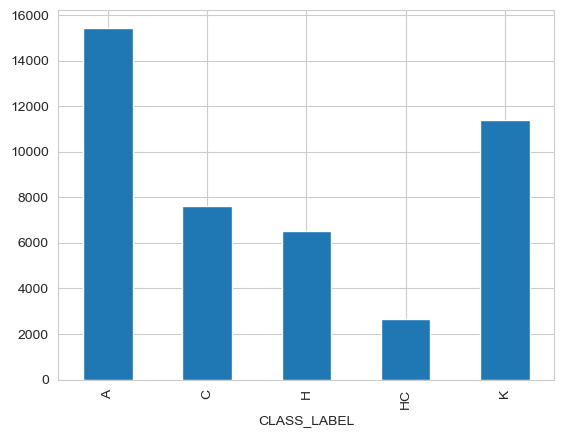

In [6]:
df.groupby(['CLASS_LABEL']).size().plot.bar()

In [7]:
df.loc[(df.CLASS_LABEL=='HC') , df.columns[3:-3]].mean()

c_ml_min_r       0.027038
c_ml_max_r       0.056654
c_ml_min_l       0.029405
c_ml_max_l       0.054713
c_ap_slope_r     0.001912
c_ap_slope_l     0.001973
g_ml_max1_r      0.044364
g_ml_min_r       0.018531
g_ml_max2_r      0.040479
g_ml_max1_l      0.048012
g_ml_min_l       0.018910
g_ml_max2_l      0.038347
g_ap_min_r      -0.179631
g_ap_max_r       0.218222
g_ap_min_l      -0.178770
g_ap_max_l       0.218492
g_v_max1_r       1.113197
g_v_min_r        0.742862
g_v_max2_r       1.110203
g_v_max1_l       1.107598
g_v_min_l        0.744023
g_v_max2_l       1.110529
diff_v1          0.139354
diff_v2          0.082420
diff_ap1         0.059682
diff_ap2         0.050883
AGE             34.713149
dtype: float64

### Multi-Class Logistic Regression
* Pipeline
* Params Grid
* Get the best model and score

In [8]:
features = ['c_ml_min_r', 'c_ml_max_r',
       'c_ml_min_l', 'c_ml_max_l', 'c_ap_slope_r', 'c_ap_slope_l',
       'g_ml_max1_r', 'g_ml_min_r', 'g_ml_max2_r', 'g_ml_max1_l', 'g_ml_min_l',
       'g_ml_max2_l', 'g_ap_min_r', 'g_ap_max_r', 'g_ap_min_l', 'g_ap_max_l',
       'g_v_max1_r', 'g_v_min_r', 'g_v_max2_r', 'g_v_max1_l', 'g_v_min_l',
       'g_v_max2_l','diff_v1', 'diff_v2', 'diff_ap1', 'diff_ap2', 'AGE',
       'BMI']

selected = ['g_v_max1_r', 'g_v_min_r', 'g_v_max2_r', 'g_v_max1_l', 'g_v_min_l',
       'g_v_max2_l','diff_v1', 'diff_v2', 'diff_ap1', 'diff_ap2', 'AGE',
       'BMI']

In [9]:
X= df[selected]
y= df['CLASS_LABEL']

X.head()

g_v_max1_r  g_v_min_r  g_v_max2_r  g_v_max1_l  g_v_min_l  g_v_max2_l  \
0    1.035925   0.818121    0.987930    1.083287   0.796622    1.003385   
1    1.009803   0.819649    0.991990    1.018526   0.837006    0.999401   
2    1.010970   0.823223    0.989883    1.049092   0.815221    1.003578   
3    1.047625   0.797822    1.005463    1.118118   0.773203    1.021851   
4    1.044787   0.780821    1.009273    1.084354   0.820851    1.027245   

    diff_v1   diff_v2  diff_ap1  diff_ap2  AGE        BMI  
0  0.425223  0.260852  0.096354  0.057032   47  35.538442  
1  0.322656  0.272089  0.071507  0.056424   47  35.538442  
2  0.298372  0.244674  0.054891  0.057072   47  35.538442  
3  0.316671  0.290747  0.072747  0.063221   47  35.538442  
4  0.374801  0.332217  0.116513  0.083453   47  35.538442

In [10]:
numeric_features = selected
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = []
categorical_transformer = Pipeline(
    steps=[("encoder", OneHotEncoder(handle_unknown="ignore"))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

lc = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("classifier", LogisticRegression(solver='lbfgs'))]
)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
lc.fit(X_train, y_train)
print("model score: %.3f" % lc.score(X_test, y_test))

model score: 0.472


In [12]:
%%time
param_grid = {
    "classifier__C": [0.1, 1.0, 10, 100],
    "classifier__penalty": ['l2', None],
    "classifier__multi_class": ['ovr', 'multinomial'],
}

gs_lc = GridSearchCV(lc,
                  param_grid,
                  cv=5)

gs_lc.fit(X_train, y_train)

CPU times: total: 19 s
Wall time: 20.9 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['g_v_max1_r',
                                                                          'g_v_min_r',
                                                                          'g_v_max2_r',
                                                                          'g_v_max1_l',
                                                                          'g_v_min_l',
                                                                          'g_v_max2_l',
                                                                          'diff_v1',
                                                                          'diff_v2',
                                                                          'diff_ap1',
                                                                          'diff_ap2',
                                                                          'AGE',
                                                                          'BMI']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         [])])),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.1, 1.0, 10, 100],
                         'classifier__multi_class': ['ovr', 'multinomial'],
                         'classifier__penalty': ['l2', None]})

In [13]:
print("Best params:")
print(gs_lc.best_params_)
print(f"Training CV score: {gs_lc.best_score_:.3f}")

Best params:
{'classifier__C': 10, 'classifier__multi_class': 'multinomial', 'classifier__penalty': 'l2'}
Training CV score: 0.470


In [14]:
cv_results = pd.DataFrame(gs_lc.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[
    [
        "mean_test_score",
        "std_test_score",
        "param_classifier__C",
        "param_classifier__penalty",
        "param_classifier__multi_class"
    ]
].head(5)

mean_test_score  std_test_score param_classifier__C  \
10         0.469588        0.004088                  10   
14         0.469558        0.004092                 100   
6          0.469466        0.004115                 1.0   
2          0.469344        0.004299                 0.1   
8          0.467082        0.006569                  10   

   param_classifier__penalty param_classifier__multi_class  
10                        l2                   multinomial  
14                        l2                   multinomial  
6                         l2                   multinomial  
2                         l2                   multinomial  
8                         l2                           ovr

In [15]:
gs_lc.classes_

array(['A', 'C', 'H', 'HC', 'K'], dtype=object)

In [16]:
pred_labels = gs_lc.best_estimator_.predict(X_test)
pred_labels

array(['K', 'HC', 'K', ..., 'A', 'A', 'H'], dtype=object)

In [17]:
y_test

14935     K
2322     HC
7155      K
33778     A
32796     H
         ..
53        C
3160      A
38388     K
5484      A
5910      K
Name: CLASS_LABEL, Length: 10906, dtype: object

In [18]:
#Create confusion matrix
cm = confusion_matrix(y_test, pred_labels)
print(cm)

[[2494  398  135   96  779]
 [ 843  751   65   10  205]
 [ 631   73  251   76  585]
 [ 124    4   35  273  252]
 [1120   62  174   95 1375]]


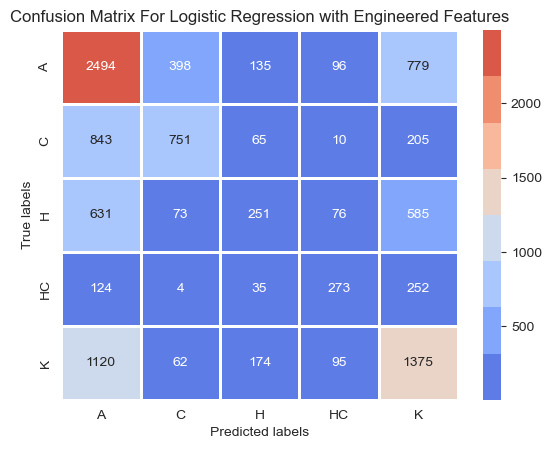

In [19]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap=sns.color_palette("coolwarm", 8), linewidths=1, linecolor='w');

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix For Logistic Regression with Engineered Features'); 
ax.xaxis.set_ticklabels(gs_lc.classes_); 
ax.yaxis.set_ticklabels(gs_lc.classes_);

In [20]:
def confusion_matrix_metrics(cls, cm):
    TP = cm[cls, cls]
    FN = cm[cls].sum() - TP
    FP = cm[:, cls].sum() - TP
    TN = cm.sum() - TP - FN - FP
    return np.array([[TP, FN], [FP, TN]])

In [21]:
for cls in range(cm.shape[0]):
    print(f'[Class {gs_lc.classes_[cls]} vs others]')
    TP, FN, FP, TN = confusion_matrix_metrics(cls, cm).ravel()
    print(f'TP: {TP}, FN: {FN}, FP: {FP}, TN: {TN}')

[Class A vs others]
TP: 2494, FN: 1408, FP: 2718, TN: 4286
[Class C vs others]
TP: 751, FN: 1123, FP: 537, TN: 8495
[Class H vs others]
TP: 251, FN: 1365, FP: 409, TN: 8881
[Class HC vs others]
TP: 273, FN: 415, FP: 277, TN: 9941
[Class K vs others]
TP: 1375, FN: 1451, FP: 1821, TN: 6259


In [22]:
print(classification_report(y_test, pred_labels,target_names=gs_lc.classes_))

              precision    recall  f1-score   support

           A       0.48      0.64      0.55      3902
           C       0.58      0.40      0.48      1874
           H       0.38      0.16      0.22      1616
          HC       0.50      0.40      0.44       688
           K       0.43      0.49      0.46      2826

    accuracy                           0.47     10906
   macro avg       0.47      0.42      0.43     10906
weighted avg       0.47      0.47      0.46     10906



In [23]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [24]:
results = pd.DataFrame([], columns = ['Model', 'Parameters', 'Train Score', 'Test Score'])

In [25]:
results = results.append({'Model': 'Logistic Regression', 
                          'Parameters': gs_lc.best_params_,
                          'Train Score': gs_lc.score(X_test,y_test),
                          'Test Score': gs_lc.best_score_
                         }, ignore_index=True)
results

Model  \
0  Logistic Regression   

                                                                                     Parameters  \
0  {'classifier__C': 10, 'classifier__multi_class': 'multinomial', 'classifier__penalty': 'l2'}   

   Train Score  Test Score  
0  0.471667     0.469588

## Decision tree

In [26]:
X= df[selected]
y= df['CLASS_LABEL']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [28]:
dt = DecisionTreeClassifier(random_state=42)

In [29]:
%%time
gs_dt = GridSearchCV(dt,
                    param_grid = {'max_depth': [5],
                                  'min_samples_split': [3,5],
                                  'min_samples_leaf': [2,3],
                                  'max_leaf_nodes': [20,30],
                                  'ccp_alpha': [0.002]},
                    cv = 3,
                    verbose = 1)
gs_dt.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
CPU times: total: 4.58 s
Wall time: 4.92 s


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.002], 'max_depth': [5],
                         'max_leaf_nodes': [20, 30], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [3, 5]},
             verbose=1)

In [30]:
print(f'Score on training set: {gs_dt.best_estimator_.score(X_train, y_train)}')
print(f'Score on testing set: {gs_dt.best_estimator_.score(X_test, y_test)}')

Score on training set: 0.4271349104468488
Score on testing set: 0.4249037227214377


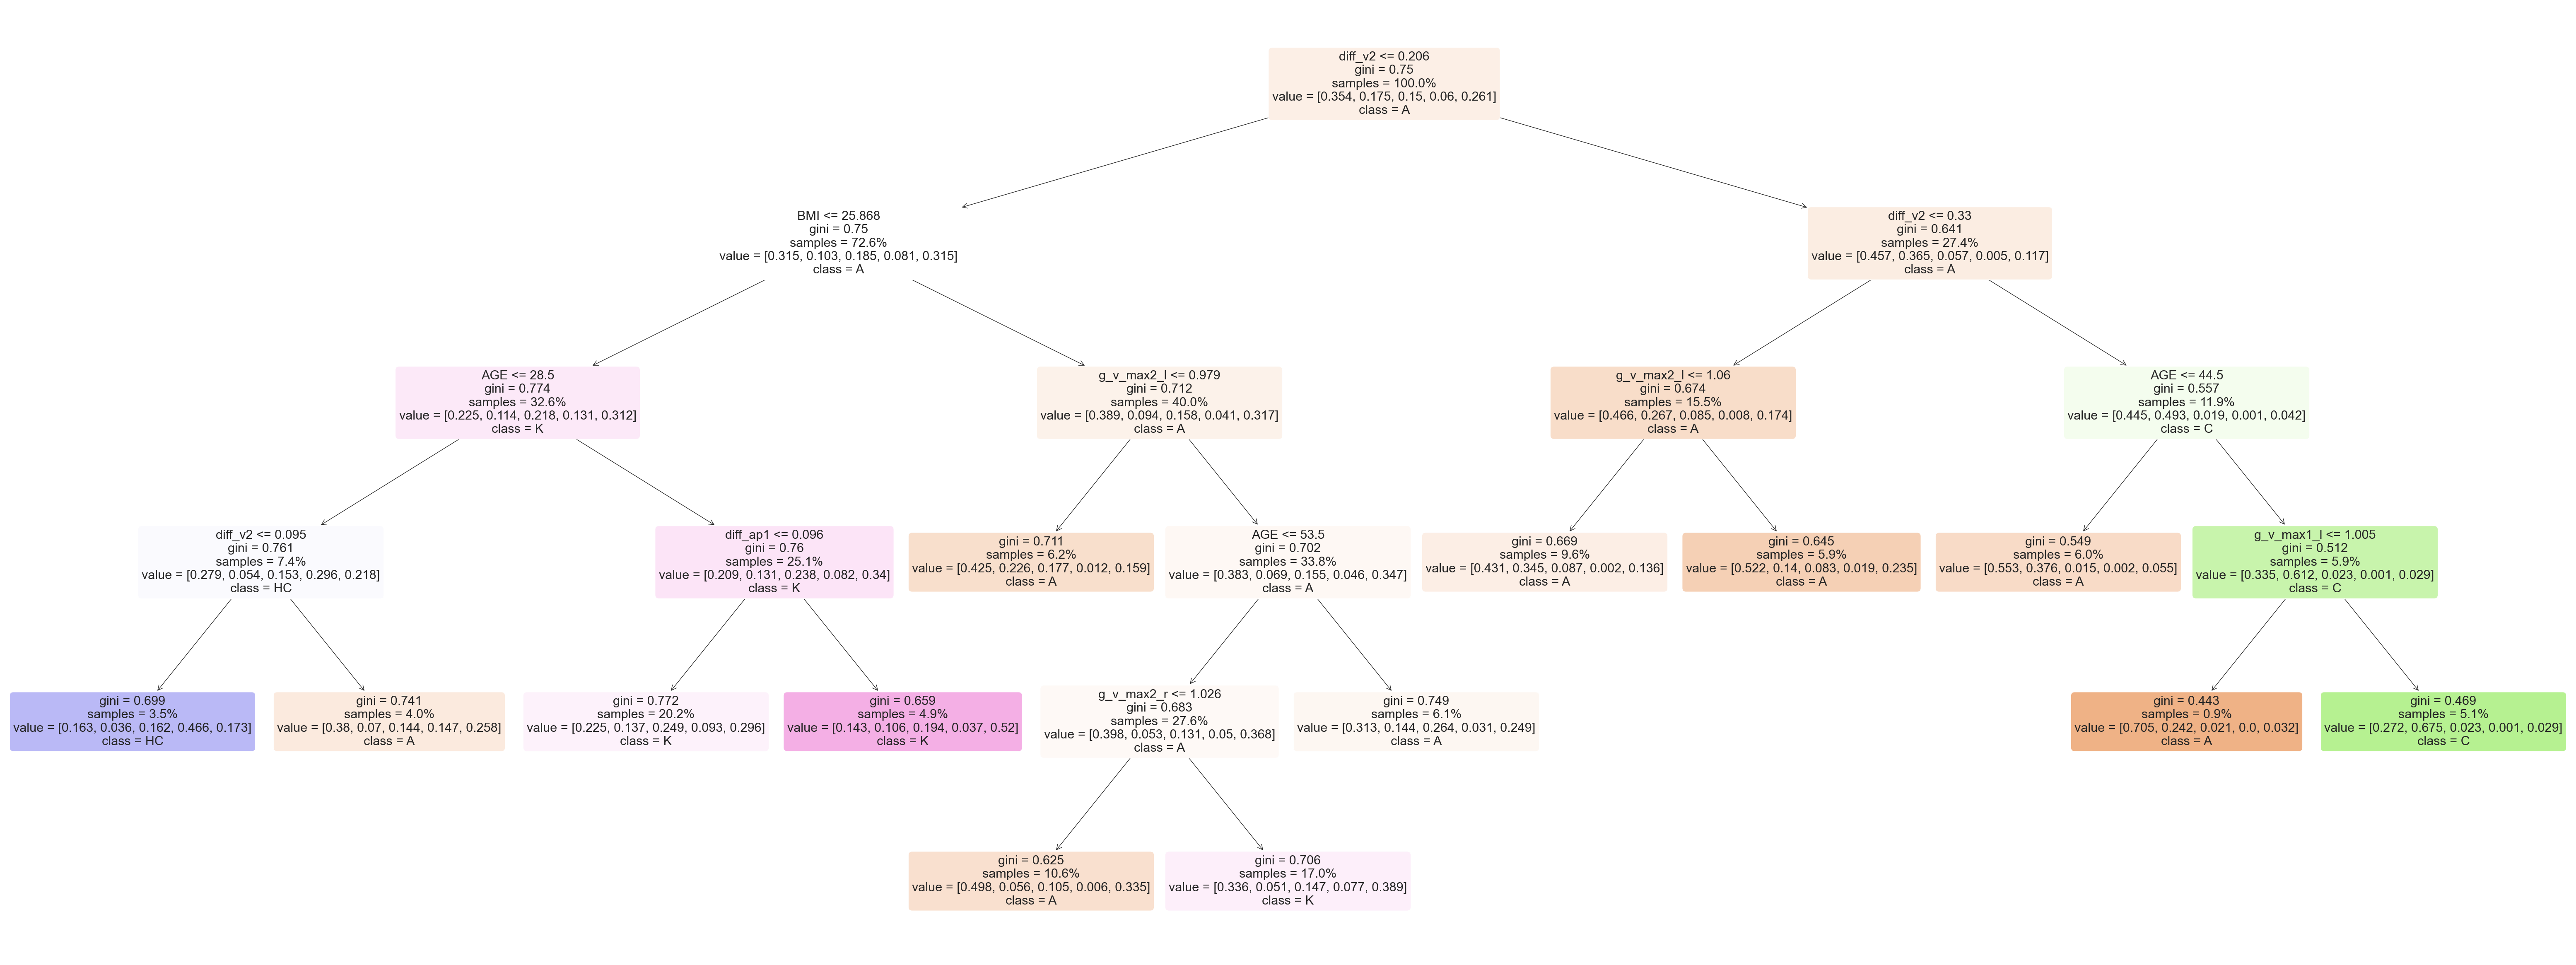

In [134]:
from sklearn.tree import plot_tree

# Establish size of figure.
plt.figure(figsize = (80, 30))

# Plot our tree.
plot_tree(gs_dt.best_estimator_,
          feature_names = X_train.columns,
          class_names = gs_dt.classes_,
          filled = True, 
          fontsize=22,
          proportion = True,
          rounded=True);

In [32]:
# Import export_text from sklearn.tree module.
from sklearn.tree import export_text

# Print out tree in plaintext.
print(export_text(gs_dt.best_estimator_,
                  feature_names=list(X_train.columns)))

|--- diff_v2 <= 0.21
|   |--- BMI <= 25.87
|   |   |--- AGE <= 28.50
|   |   |   |--- diff_v2 <= 0.10
|   |   |   |   |--- class: HC
|   |   |   |--- diff_v2 >  0.10
|   |   |   |   |--- class: A
|   |   |--- AGE >  28.50
|   |   |   |--- diff_ap1 <= 0.10
|   |   |   |   |--- class: K
|   |   |   |--- diff_ap1 >  0.10
|   |   |   |   |--- class: K
|   |--- BMI >  25.87
|   |   |--- g_v_max2_l <= 0.98
|   |   |   |--- class: A
|   |   |--- g_v_max2_l >  0.98
|   |   |   |--- AGE <= 53.50
|   |   |   |   |--- g_v_max2_r <= 1.03
|   |   |   |   |   |--- class: A
|   |   |   |   |--- g_v_max2_r >  1.03
|   |   |   |   |   |--- class: K
|   |   |   |--- AGE >  53.50
|   |   |   |   |--- class: A
|--- diff_v2 >  0.21
|   |--- diff_v2 <= 0.33
|   |   |--- g_v_max2_l <= 1.06
|   |   |   |--- class: A
|   |   |--- g_v_max2_l >  1.06
|   |   |   |--- class: A
|   |--- diff_v2 >  0.33
|   |   |--- AGE <= 44.50
|   |   |   |--- class: A
|   |   |--- AGE >  44.50
|   |   |   |--- g_v_max1_l <= 1.01

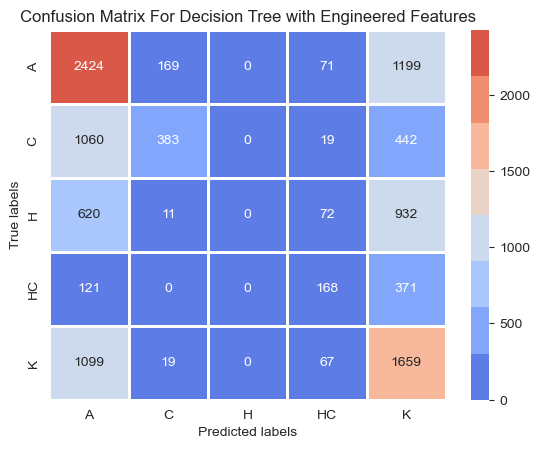

In [33]:
pred_labels = gs_dt.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, pred_labels)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap=sns.color_palette("coolwarm", 8), linewidths=1, linecolor='w');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix For Decision Tree with Engineered Features'); 
ax.xaxis.set_ticklabels(gs_lc.classes_); 
ax.yaxis.set_ticklabels(gs_lc.classes_);

In [34]:
for cls in range(cm.shape[0]):
    print(f'[Class {gs_lc.classes_[cls]} vs others]')
    TP, FN, FP, TN = confusion_matrix_metrics(cls, cm).ravel()
    print(f'TP: {TP}, FN: {FN}, FP: {FP}, TN: {TN}')

[Class A vs others]
TP: 2424, FN: 1439, FP: 2900, TN: 4143
[Class C vs others]
TP: 383, FN: 1521, FP: 199, TN: 8803
[Class H vs others]
TP: 0, FN: 1635, FP: 0, TN: 9271
[Class HC vs others]
TP: 168, FN: 492, FP: 229, TN: 10017
[Class K vs others]
TP: 1659, FN: 1185, FP: 2944, TN: 5118


In [35]:
print(classification_report(y_test, pred_labels,target_names=gs_dt.classes_))

              precision    recall  f1-score   support

           A       0.46      0.63      0.53      3863
           C       0.66      0.20      0.31      1904
           H       0.00      0.00      0.00      1635
          HC       0.42      0.25      0.32       660
           K       0.36      0.58      0.45      2844

    accuracy                           0.42     10906
   macro avg       0.38      0.33      0.32     10906
weighted avg       0.40      0.42      0.38     10906



In [36]:
results = results.append({'Model': 'Decision Tree', 
                          'Parameters': gs_dt.best_params_,
                          'Train Score': gs_dt.best_score_,
                          'Test Score': gs_dt.score(X_test,y_test)
                         }, ignore_index=True)
results

Model  \
0  Logistic Regression   
1  Decision Tree         

                                                                                                  Parameters  \
0  {'classifier__C': 10, 'classifier__multi_class': 'multinomial', 'classifier__penalty': 'l2'}                
1  {'ccp_alpha': 0.002, 'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_samples_split': 3}   

   Train Score  Test Score  
0  0.471667     0.469588    
1  0.425943     0.424904

**Findings**
* Decision tree has 44.3% accuracy for a 5-class classification (The baseline is 35% accuracy)
* Lesser accuracy than Logistic regression <br>
* No need to scale our data.
* No assumptions about how  data is distributed
* Easier to interpret than Logistic Regression

### Bagging Trees
* Pipeline
* Params Grid
* Get the best model and score

In [37]:
X= df[features]
y= df['CLASS_LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [38]:
%%time
bc = BaggingClassifier(DecisionTreeClassifier(ccp_alpha=0.003, max_depth=5, max_leaf_nodes=15,
                                              min_samples_leaf=2, min_samples_split=3,
                                              random_state=42),
                              n_estimators=100,
                              bootstrap=True,
                              random_state=42)
bc.fit(X_train, y_train)
print(f'Score on training set: {bc.score(X_train, y_train)}')
print(f'Score on testing set: {bc.score(X_test, y_test)}')

Score on training set: 0.4519224891497035
Score on testing set: 0.4441591784338896
CPU times: total: 34.4 s
Wall time: 41.5 s


In [39]:
X= df[selected]
y= df['CLASS_LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [40]:
%%time
param_grid = {
    'base_estimator__max_depth' : [5],
    'base_estimator__max_leaf_nodes' : [20,30],
    'base_estimator__ccp_alpha': [0.002],
    'max_samples' : [0.3, 0.5],
    'n_estimators': [5,10],
    'base_estimator__min_samples_leaf':[2], 
    'base_estimator__min_samples_split':[3],
}

gs_bc = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(random_state=42)), param_grid)
gs_bc.fit(X_train, y_train)
print(f'Score on training set: {gs_bc.score(X_train, y_train)}')
print(f'Score on testing set: {gs_bc.score(X_test, y_test)}'),

Score on training set: 0.47512072865089555
Score on testing set: 0.46231432239134423
CPU times: total: 20.2 s
Wall time: 21.6 s


(None,)

In [41]:
gs_bc.best_estimator_.estimators_[0]

DecisionTreeClassifier(ccp_alpha=0.002, max_depth=5, max_leaf_nodes=20,
                       min_samples_leaf=2, min_samples_split=3,
                       random_state=378997450)

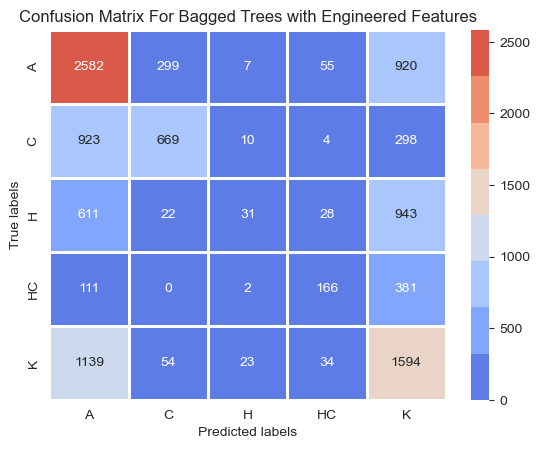

In [42]:
pred_labels = gs_bc.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, pred_labels)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap=sns.color_palette("coolwarm", 8), linewidths=1, linecolor='w');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix For Bagged Trees with Engineered Features'); 
ax.xaxis.set_ticklabels(gs_bc.classes_); 
ax.yaxis.set_ticklabels(gs_bc.classes_);

In [43]:
for cls in range(cm.shape[0]):
    print(f'[Class {gs_bc.classes_[cls]} vs others]')
    TP, FN, FP, TN = confusion_matrix_metrics(cls, cm).ravel()
    print(f'TP: {TP}, FN: {FN}, FP: {FP}, TN: {TN}')

[Class A vs others]
TP: 2582, FN: 1281, FP: 2784, TN: 4259
[Class C vs others]
TP: 669, FN: 1235, FP: 375, TN: 8627
[Class H vs others]
TP: 31, FN: 1604, FP: 42, TN: 9229
[Class HC vs others]
TP: 166, FN: 494, FP: 121, TN: 10125
[Class K vs others]
TP: 1594, FN: 1250, FP: 2542, TN: 5520


In [44]:
print(classification_report(y_test, pred_labels,target_names=gs_dt.classes_))

              precision    recall  f1-score   support

           A       0.48      0.67      0.56      3863
           C       0.64      0.35      0.45      1904
           H       0.42      0.02      0.04      1635
          HC       0.58      0.25      0.35       660
           K       0.39      0.56      0.46      2844

    accuracy                           0.46     10906
   macro avg       0.50      0.37      0.37     10906
weighted avg       0.48      0.46      0.42     10906



In [45]:
results = results.append({'Model': 'Bagging Classifier (Decision tree)', 
                          'Parameters': gs_bc.best_params_,
                          'Train Score': gs_bc.best_score_,
                          'Test Score': gs_bc.best_estimator_.score(X_test,y_test)
                         }, ignore_index=True)
results

Model  \
0  Logistic Regression                  
1  Decision Tree                        
2  Bagging Classifier (Decision tree)   

                                                                                                                                                                                                                          Parameters  \
0  {'classifier__C': 10, 'classifier__multi_class': 'multinomial', 'classifier__penalty': 'l2'}                                                                                                                                        
1  {'ccp_alpha': 0.002, 'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_samples_split': 3}                                                                                                                           
2  {'base_estimator__ccp_alpha': 0.002, 'base_estimator__max_depth': 5, 'base_estimator__max_leaf_nodes': 20, 'base_estimator__min_samples_leaf': 2, 'base_estimator__min_samples_split': 3, 'max_samples': 0.3, 'n_estimators': 10}   

   Train Score  Test Score  
0  0.471667     0.469588    
1  0.425943     0.424904    
2  0.471514     0.462314

In [46]:
# First tree in text format
print(export_text(gs_bc.best_estimator_.estimators_[0],
                  feature_names=list(X_train.columns)))

|--- diff_v2 <= 0.21
|   |--- BMI <= 25.93
|   |   |--- AGE <= 26.50
|   |   |   |--- AGE <= 18.50
|   |   |   |   |--- class: 3
|   |   |   |--- AGE >  18.50
|   |   |   |   |--- diff_v2 <= 0.11
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- diff_v2 >  0.11
|   |   |   |   |   |--- class: 0
|   |   |--- AGE >  26.50
|   |   |   |--- g_v_max2_l <= 0.98
|   |   |   |   |--- class: 1
|   |   |   |--- g_v_max2_l >  0.98
|   |   |   |   |--- diff_v1 <= 0.15
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- diff_v1 >  0.15
|   |   |   |   |   |--- class: 4
|   |--- BMI >  25.93
|   |   |--- g_v_max2_l <= 1.00
|   |   |   |--- class: 0
|   |   |--- g_v_max2_l >  1.00
|   |   |   |--- AGE <= 53.50
|   |   |   |   |--- AGE <= 29.50
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- AGE >  29.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- AGE >  53.50
|   |   |   |   |--- class: 2
|--- diff_v2 >  0.21
|   |--- g_v_max2_l <= 0.98
|   |   |--- AGE <= 31.50
|   |   |   |---

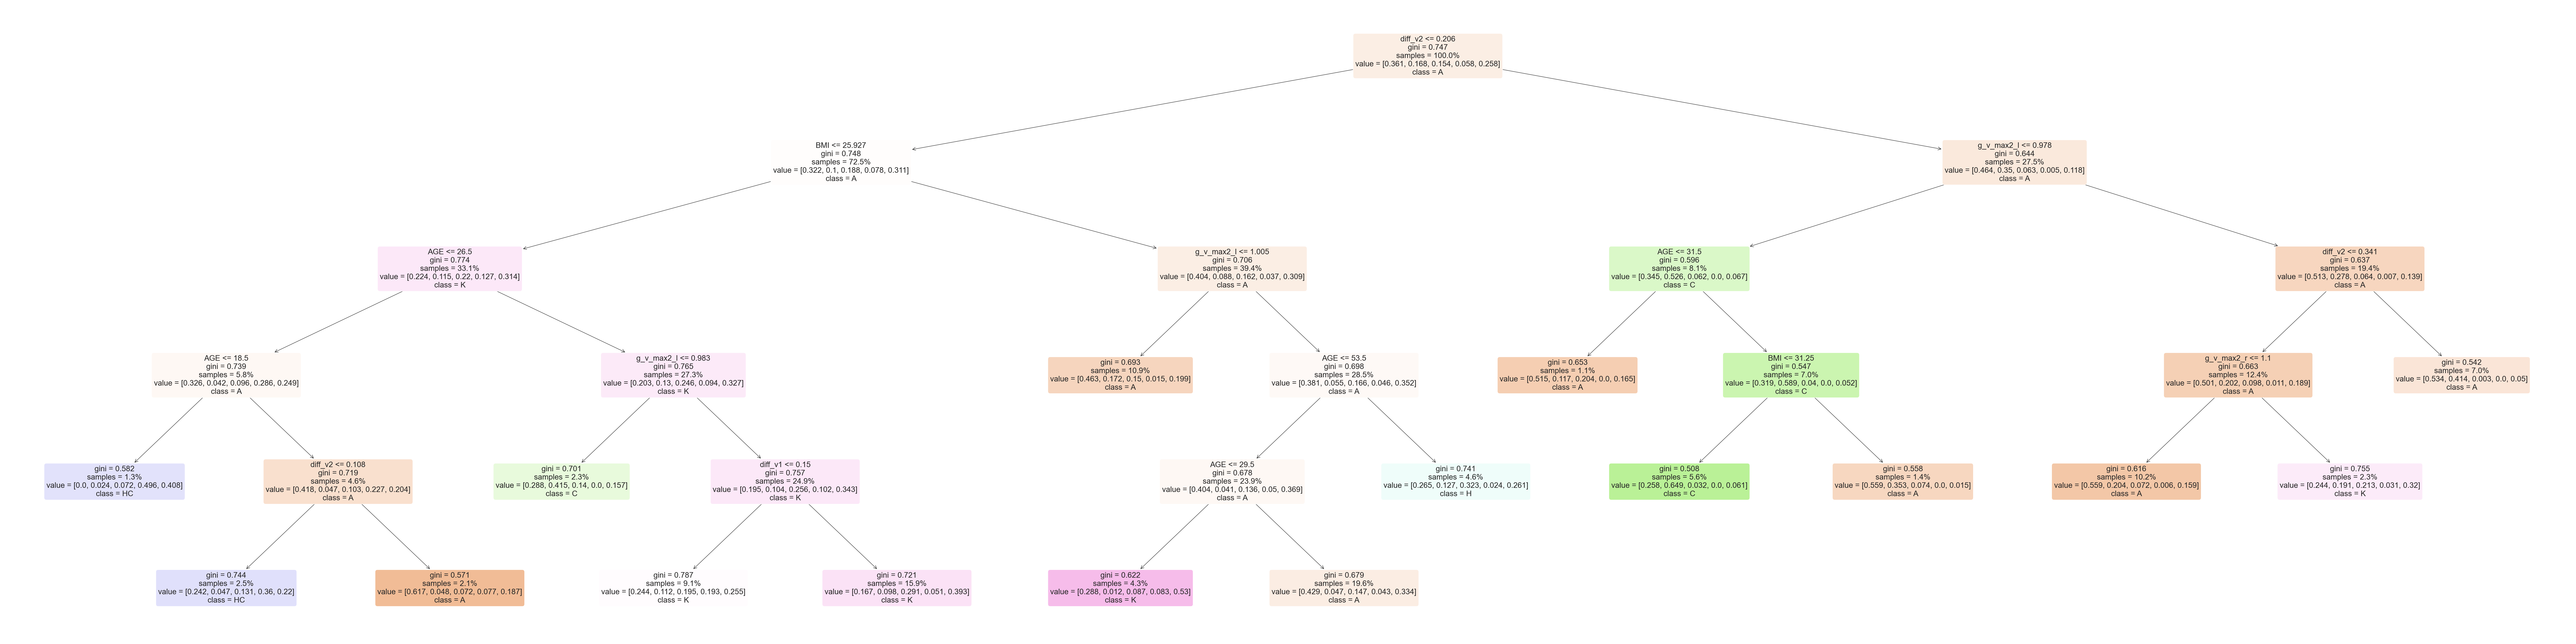

In [47]:
# First Tree in the bagged classifier
plt.figure(figsize = (120, 30))
plot_tree(gs_bc.best_estimator_.estimators_[0],
          feature_names = X_train.columns,
          class_names = bc.classes_,
          filled = True, 
          fontsize=20,
          proportion = True,
          rounded=True);

### Random Forests

In [48]:
X= df[features]
y= df['CLASS_LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [49]:
%%time
rf = RandomForestClassifier(n_estimators=10,
                            ccp_alpha=0.001, 
                            max_depth=5, 
                            max_leaf_nodes=30,
                            min_samples_leaf=2, 
                            min_samples_split=3,
                            random_state=42)
cross_val_score(rf, X_train, y_train, cv=5).mean()

CPU times: total: 2.84 s
Wall time: 3.15 s


0.4778102225376081

In [50]:
X= df[selected]
y= df['CLASS_LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [51]:
%%time
rf = RandomForestClassifier(n_estimators=10,
                            ccp_alpha=0.001, 
                            max_depth=5, 
                            max_leaf_nodes=30,
                            min_samples_leaf=2, 
                            min_samples_split=3,
                            random_state=42)
cross_val_score(rf, X_train, y_train, cv=5).mean()

CPU times: total: 1.83 s
Wall time: 1.93 s


0.46167284079329257

* The performance is quite close even though we prune the features down to 6

In [52]:
%%time
rf_params = {
    'n_estimators': [10],
    'ccp_alpha': [0.002],
    'max_depth':[5],
    'max_leaf_nodes':[10,20,30]
}
gs_rf = GridSearchCV(rf, param_grid=rf_params, cv=3)
gs_rf.fit(X_train, y_train)

print(f'Score on training set: {gs_rf.best_estimator_.score(X_train, y_train)}')
print(f'Score on testing set: {gs_rf.best_estimator_.score(X_test, y_test)}')

Score on training set: 0.44904945290054404
Score on testing set: 0.44342563726389145
CPU times: total: 3.23 s
Wall time: 3.42 s


In [53]:
gs_rf.best_estimator_.estimators_[0]

DecisionTreeClassifier(ccp_alpha=0.002, max_depth=5, max_features='sqrt',
                       max_leaf_nodes=20, min_samples_leaf=2,
                       min_samples_split=3, random_state=1608637542)

In [54]:
# First tree in text format
print(export_text(gs_rf.best_estimator_.estimators_[0],
                  feature_names=list(X_train.columns)))

|--- diff_ap2 <= 0.08
|   |--- g_v_max2_l <= 1.00
|   |   |--- class: 0.0
|   |--- g_v_max2_l >  1.00
|   |   |--- BMI <= 25.48
|   |   |   |--- g_v_max1_r <= 1.05
|   |   |   |   |--- diff_v2 <= 0.26
|   |   |   |   |   |--- class: 4.0
|   |   |   |   |--- diff_v2 >  0.26
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- g_v_max1_r >  1.05
|   |   |   |   |--- diff_v2 <= 0.10
|   |   |   |   |   |--- class: 3.0
|   |   |   |   |--- diff_v2 >  0.10
|   |   |   |   |   |--- class: 0.0
|   |   |--- BMI >  25.48
|   |   |   |--- AGE <= 53.50
|   |   |   |   |--- g_v_max2_r <= 1.03
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- g_v_max2_r >  1.03
|   |   |   |   |   |--- class: 4.0
|   |   |   |--- AGE >  53.50
|   |   |   |   |--- class: 0.0
|--- diff_ap2 >  0.08
|   |--- g_v_max2_r <= 1.04
|   |   |--- class: 0.0
|   |--- g_v_max2_r >  1.04
|   |   |--- diff_v1 <= 0.27
|   |   |   |--- diff_v2 <= 0.28
|   |   |   |   |--- class: 4.0
|   |   |   |--- diff_v2 >  0.28
|   |   |

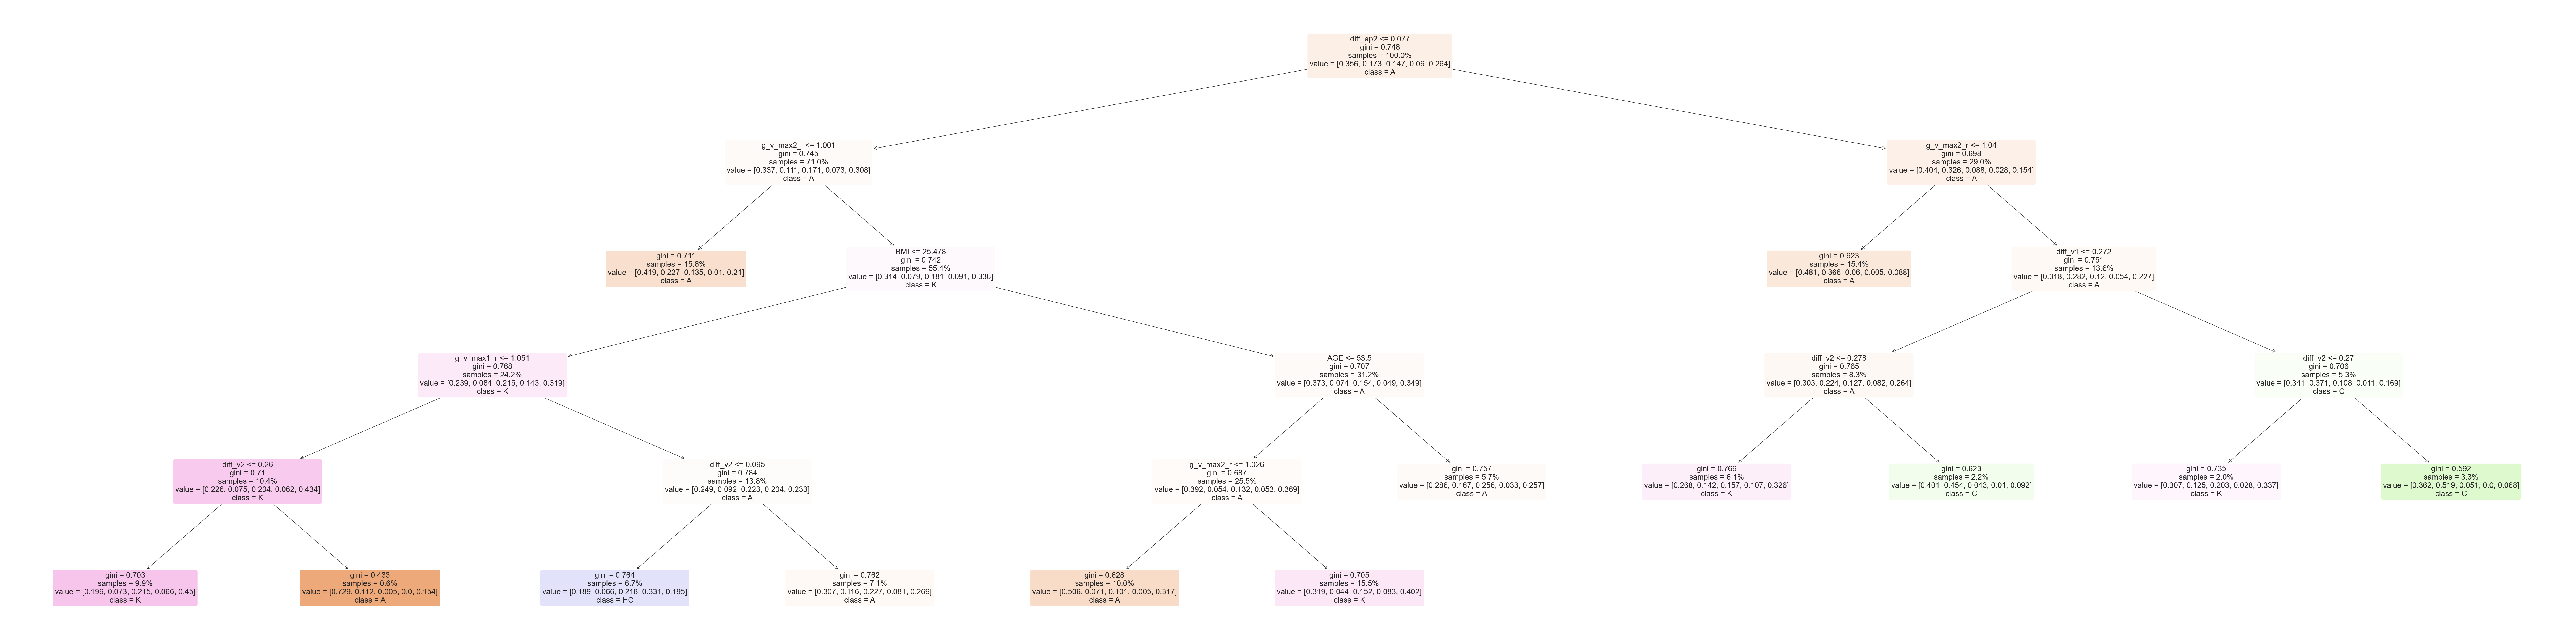

In [55]:
# Plot first tree in the bag classifier
plt.figure(figsize = (120, 30))
plot_tree(gs_rf.best_estimator_.estimators_[0],
              feature_names = X_train.columns,
              class_names = gs_rf.classes_,
              filled = True, 
              fontsize=20,
              proportion = True,
              rounded=True);

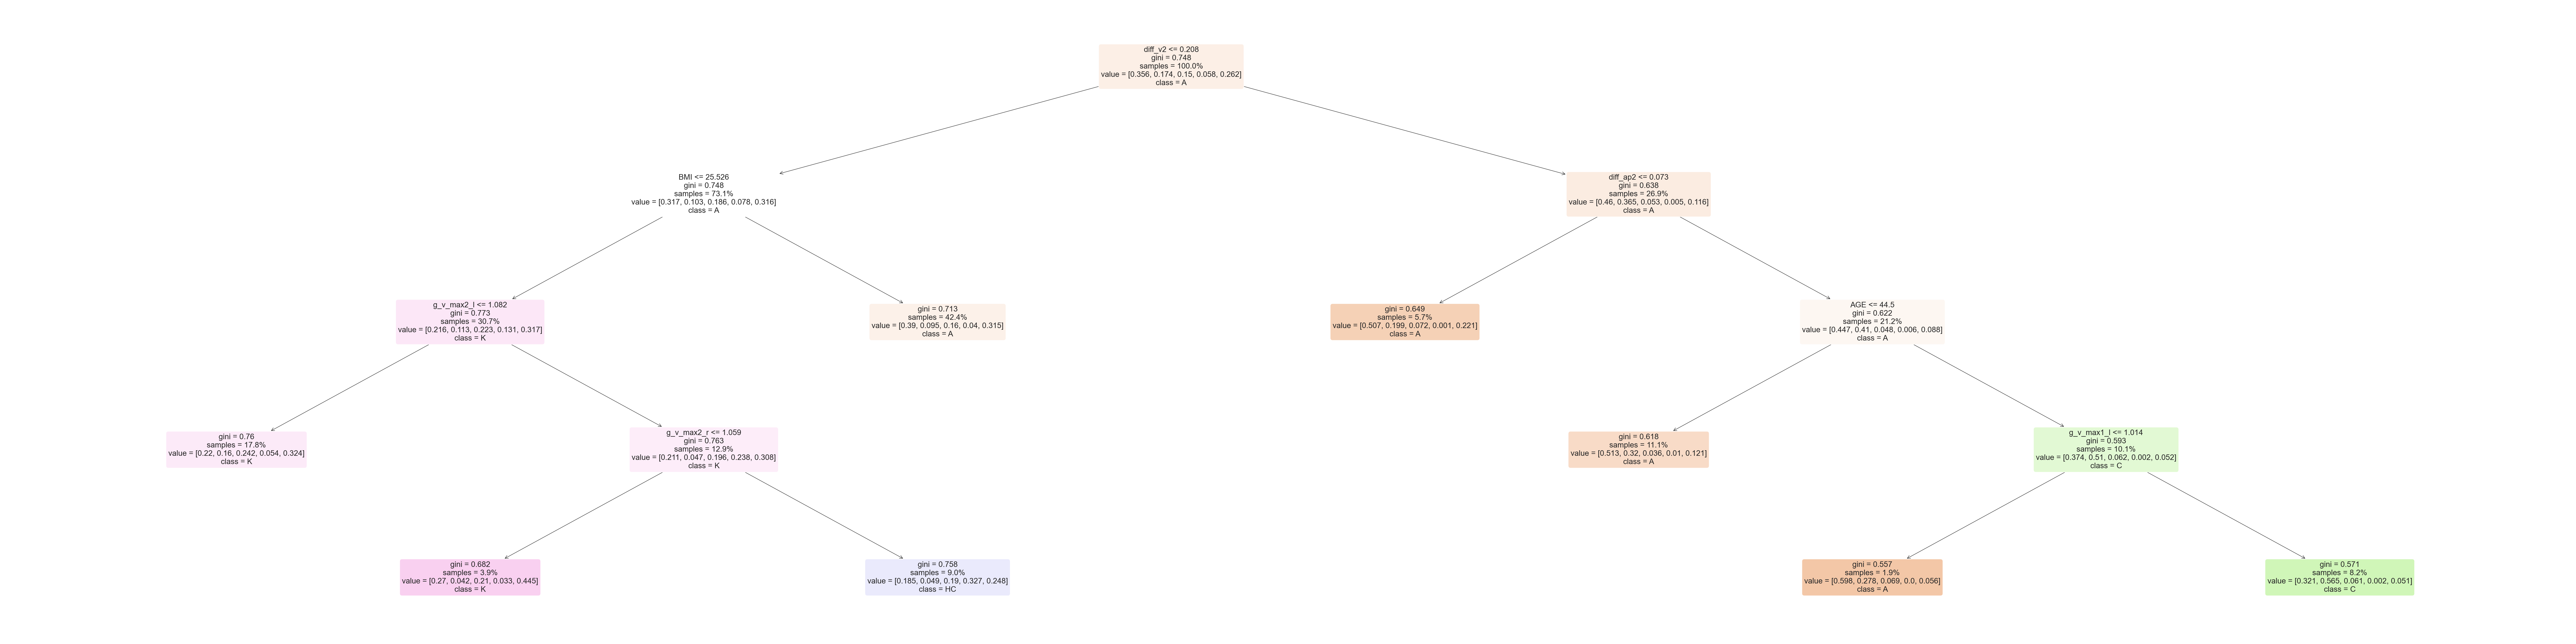

In [56]:
# Plot 5th tree in the bag classifier
plt.figure(figsize = (120, 30))
plot_tree(gs_rf.best_estimator_.estimators_[5],
              feature_names = X_train.columns,
              class_names = bc.classes_,
              filled = True, 
              fontsize=20,
              proportion = True,
              rounded=True);

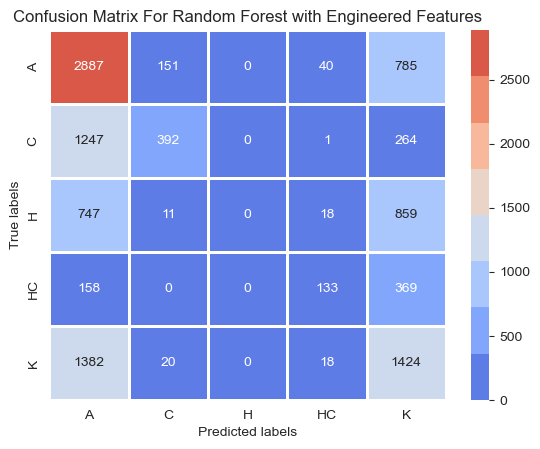

In [57]:
pred_labels = gs_rf.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, pred_labels)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap=sns.color_palette("coolwarm", 8), linewidths=1, linecolor='w');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix For Random Forest with Engineered Features'); 
ax.xaxis.set_ticklabels(gs_rf.classes_); 
ax.yaxis.set_ticklabels(gs_rf.classes_);

In [58]:
for cls in range(cm.shape[0]):
    print(f'[Class {gs_rf.classes_[cls]} vs others]')
    TP, FN, FP, TN = confusion_matrix_metrics(cls, cm).ravel()
    print(f'TP: {TP}, FN: {FN}, FP: {FP}, TN: {TN}')

[Class A vs others]
TP: 2887, FN: 976, FP: 3534, TN: 3509
[Class C vs others]
TP: 392, FN: 1512, FP: 182, TN: 8820
[Class H vs others]
TP: 0, FN: 1635, FP: 0, TN: 9271
[Class HC vs others]
TP: 133, FN: 527, FP: 77, TN: 10169
[Class K vs others]
TP: 1424, FN: 1420, FP: 2277, TN: 5785


In [59]:
print(classification_report(y_test, pred_labels,target_names=gs_rf.classes_))

              precision    recall  f1-score   support

           A       0.45      0.75      0.56      3863
           C       0.68      0.21      0.32      1904
           H       0.00      0.00      0.00      1635
          HC       0.63      0.20      0.31       660
           K       0.38      0.50      0.44      2844

    accuracy                           0.44     10906
   macro avg       0.43      0.33      0.32     10906
weighted avg       0.42      0.44      0.39     10906



In [60]:
results = results.append({'Model': 'Random Forest', 
                          'Parameters': gs_rf.best_estimator_[0],
                          'Train Score': gs_rf.best_score_,
                          'Test Score': gs_rf.best_estimator_.score(X_test,y_test)
                         }, ignore_index=True)
results

Model  \
0  Logistic Regression                  
1  Decision Tree                        
2  Bagging Classifier (Decision tree)   
3  Random Forest                        

                                                                                                                                                                                                                          Parameters  \
0  {'classifier__C': 10, 'classifier__multi_class': 'multinomial', 'classifier__penalty': 'l2'}                                                                                                                                        
1  {'ccp_alpha': 0.002, 'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_samples_split': 3}                                                                                                                           
2  {'base_estimator__ccp_alpha': 0.002, 'base_estimator__max_depth': 5, 'base_estimator__max_leaf_nodes': 20, 'base_estimator__min_samples_leaf': 2, 'base_estimator__min_samples_split': 3, 'max_samples': 0.3, 'n_estimators': 10}   
3  DecisionTreeClassifier(ccp_alpha=0.002, max_depth=5, max_features='sqrt',\n                       max_leaf_nodes=20, min_samples_leaf=2,\n                       min_samples_split=3, random_state=1608637542)                      

   Train Score  Test Score  
0  0.471667     0.469588    
1  0.425943     0.424904    
2  0.471514     0.462314    
3  0.444587     0.443426

## Gradient Boosting
* Decision trees and ensemble methods do not require feature scaling as they are not sensitive to variance in data

In [61]:
X= df[selected]
y= df['CLASS_LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [62]:
%%time
gboost = GradientBoostingClassifier()
gboost_params = {
    'max_depth': [5],
    'n_estimators': [10],
    'learning_rate': [1,1.5]
}
gs_gboost = GridSearchCV(gboost, param_grid=gboost_params)
gs_gboost.fit(X_train, y_train)

print(f'Score on training set: {gs_gboost.best_estimator_.score(X_train, y_train)}')
print(f'Score on testing set: {gs_gboost.best_estimator_.score(X_test, y_test)}')
print(gs_gboost.best_params_)

Score on training set: 0.75466104285103
Score on testing set: 0.7040161379057399
{'learning_rate': 1, 'max_depth': 5, 'n_estimators': 10}
CPU times: total: 1min 37s
Wall time: 1min 44s


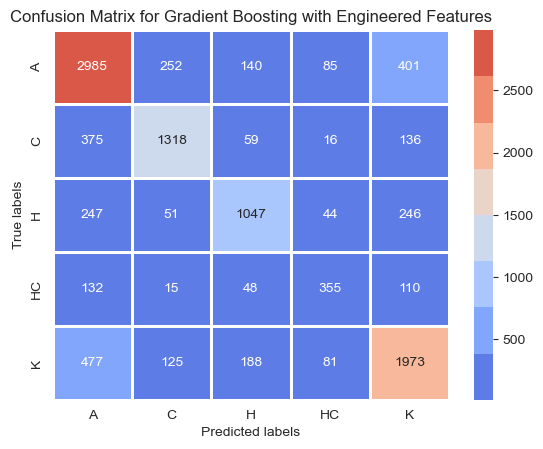

In [63]:
pred_labels = gs_gboost.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, pred_labels)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap=sns.color_palette("coolwarm", 8), linewidths=1, linecolor='w');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Gradient Boosting with Engineered Features'); 
ax.xaxis.set_ticklabels(gs_gboost.classes_); 
ax.yaxis.set_ticklabels(gs_gboost.classes_);

In [64]:
for cls in range(cm.shape[0]):
    print(f'[Class {gs_gboost.classes_[cls]} vs others]')
    TP, FN, FP, TN = confusion_matrix_metrics(cls, cm).ravel()
    print(f'TP: {TP}, FN: {FN}, FP: {FP}, TN: {TN}')

[Class A vs others]
TP: 2985, FN: 878, FP: 1231, TN: 5812
[Class C vs others]
TP: 1318, FN: 586, FP: 443, TN: 8559
[Class H vs others]
TP: 1047, FN: 588, FP: 435, TN: 8836
[Class HC vs others]
TP: 355, FN: 305, FP: 226, TN: 10020
[Class K vs others]
TP: 1973, FN: 871, FP: 893, TN: 7169


In [65]:
print(classification_report(y_test, pred_labels,target_names=gs_gboost.classes_))

              precision    recall  f1-score   support

           A       0.71      0.77      0.74      3863
           C       0.75      0.69      0.72      1904
           H       0.71      0.64      0.67      1635
          HC       0.61      0.54      0.57       660
           K       0.69      0.69      0.69      2844

    accuracy                           0.70     10906
   macro avg       0.69      0.67      0.68     10906
weighted avg       0.70      0.70      0.70     10906



In [66]:
gs_gboost.best_estimator_

GradientBoostingClassifier(learning_rate=1, max_depth=5, n_estimators=10)

In [67]:
results = results.append({'Model': 'Gradient Boost', 
                          'Parameters': gs_gboost.best_estimator_.estimators_[0][1],
                          'Train Score': gs_gboost.best_score_,
                          'Test Score': gs_gboost.best_estimator_.score(X_test,y_test)
                         }, ignore_index=True)
results

Model  \
0  Logistic Regression                  
1  Decision Tree                        
2  Bagging Classifier (Decision tree)   
3  Random Forest                        
4  Gradient Boost                       

                                                                                                                                                                                                                          Parameters  \
0  {'classifier__C': 10, 'classifier__multi_class': 'multinomial', 'classifier__penalty': 'l2'}                                                                                                                                        
1  {'ccp_alpha': 0.002, 'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_samples_split': 3}                                                                                                                           
2  {'base_estimator__ccp_alpha': 0.002, 'base_estimator__max_depth': 5, 'base_estimator__max_leaf_nodes': 20, 'base_estimator__min_samples_leaf': 2, 'base_estimator__min_samples_split': 3, 'max_samples': 0.3, 'n_estimators': 10}   
3  DecisionTreeClassifier(ccp_alpha=0.002, max_depth=5, max_features='sqrt',\n                       max_leaf_nodes=20, min_samples_leaf=2,\n                       min_samples_split=3, random_state=1608637542)                      
4  DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,\n                      random_state=RandomState(MT19937) at 0x23BB000C340)                                                                                             

   Train Score  Test Score  
0  0.471667     0.469588    
1  0.425943     0.424904    
2  0.471514     0.462314    
3  0.444587     0.443426    
4  0.684485     0.704016

### XG Boost

In [68]:
X= df[selected]
le = LabelEncoder()
y = le.fit_transform(df['CLASS_LABEL'])
y

array([1, 1, 1, ..., 3, 3, 3])

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [70]:
%%time
# A parameter grid for XGBoost
xgb_clf = XGBClassifier(objective='multi:softmax', 
                            num_class=5, 
                            gamma=1,
                            learning_rate=0.1,
                            max_depth=5,
                            reg_lambda=1, 
                            subsample=1, 
                            colsample_bytree=1,
                            seed=42)
xgb_clf.fit(X_train,y_train)

CPU times: total: 33 s
Wall time: 34 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=5,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [71]:
%%time
print(f'Score on training set: {xgb_clf.score(X_train, y_train)}')
print(f'Score on testing set: {xgb_clf.score(X_test, y_test)}')

Score on training set: 0.7171893147502904
Score on testing set: 0.6815514395745461
CPU times: total: 484 ms
Wall time: 492 ms


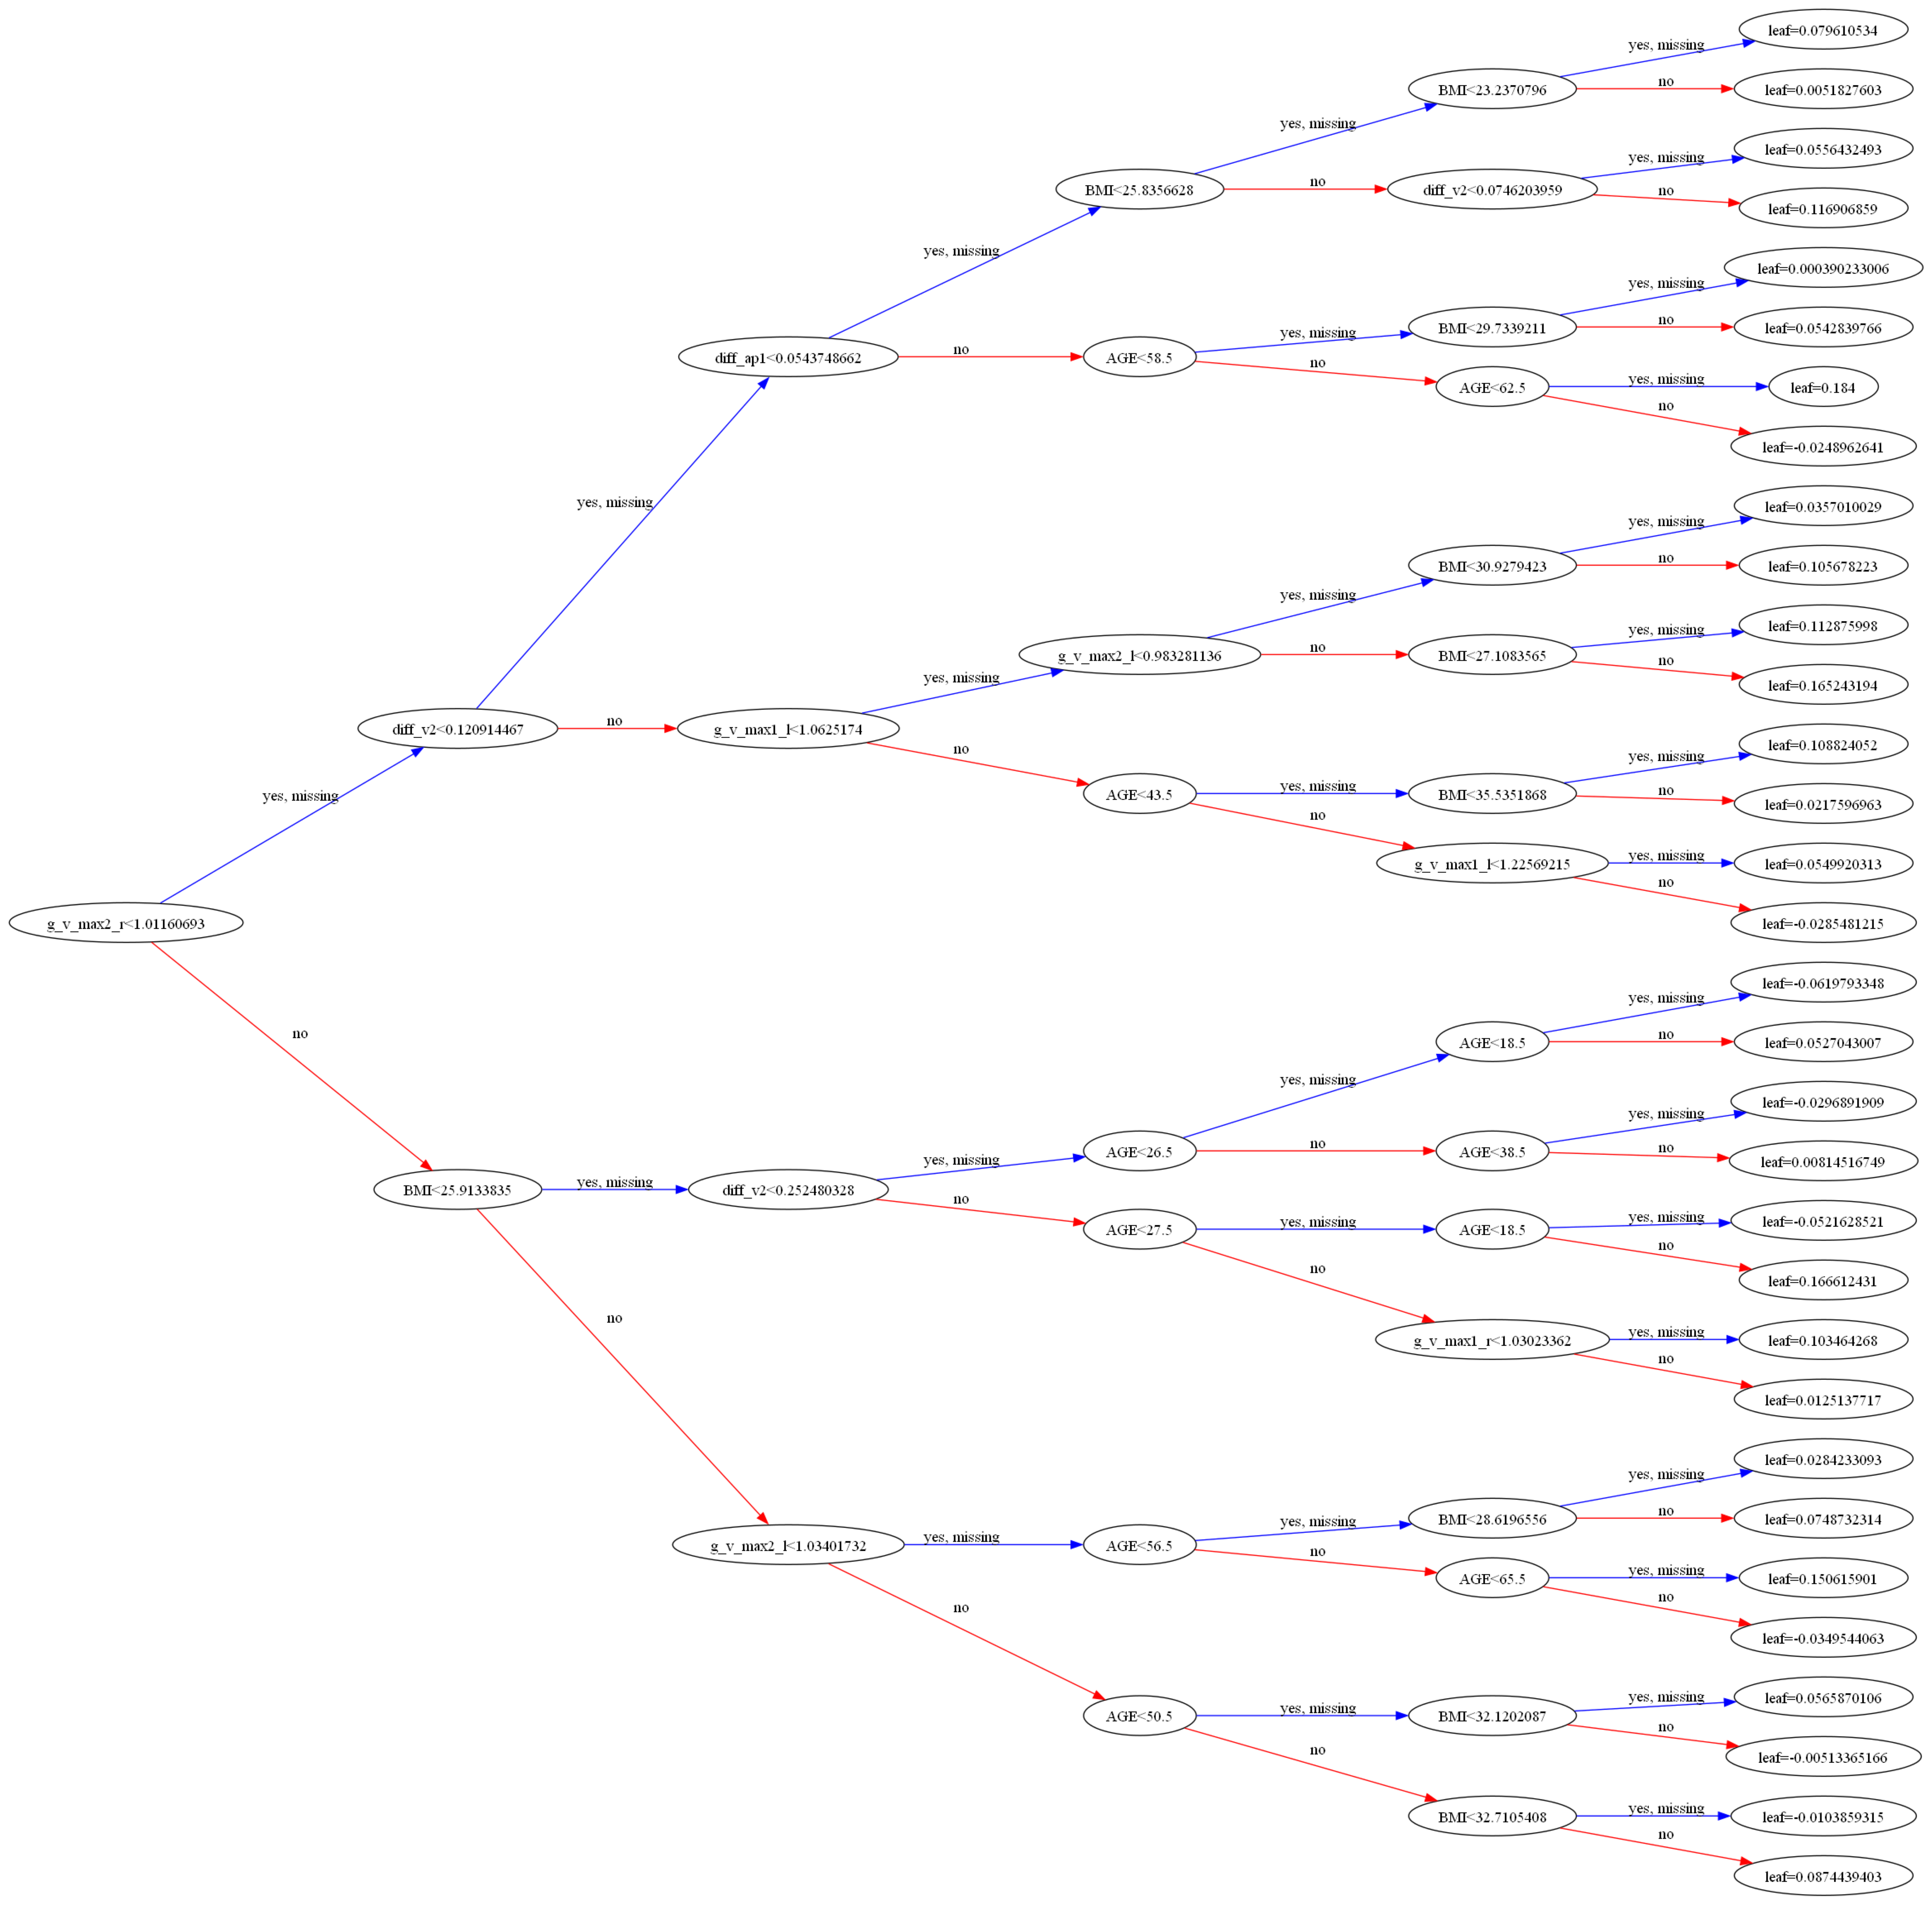

CPU times: total: 4.84 s
Wall time: 11.3 s


In [72]:
%%time
rcParams['figure.figsize'] = 80,50
plot_tree_xgb(xgb_clf, num_trees=0, rankdir='LR')
plt.show()

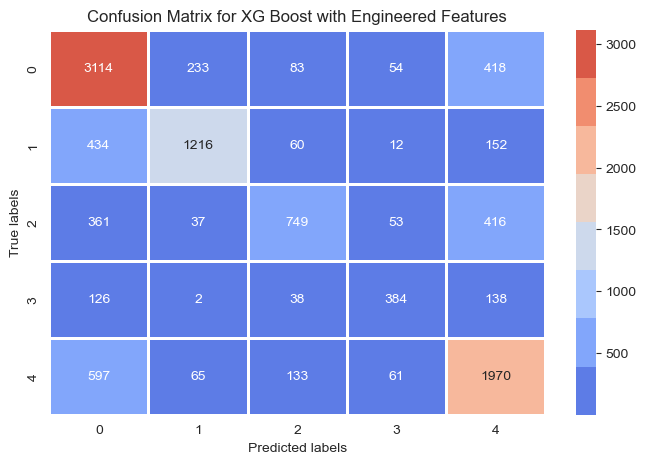

In [73]:
rcParams['figure.figsize'] = 8,5
pred_labels = xgb_clf.predict(X_test)
cm = confusion_matrix(y_test, pred_labels)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap=sns.color_palette("coolwarm", 8), linewidths=1, linecolor='w');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for XG Boost with Engineered Features'); 
ax.xaxis.set_ticklabels(xgb_clf.classes_); 
ax.yaxis.set_ticklabels(xgb_clf.classes_);

In [74]:
def confusion_matrix_metrics(cls, cm):
    TP = cm[cls, cls]
    FN = cm[cls].sum() - TP
    FP = cm[:, cls].sum() - TP
    TN = cm.sum() - TP - FN - FP
    return np.array([[TP, FN], [FP, TN]])

In [75]:
for cls in range(cm.shape[0]):
    print(f'[Class {xgb_clf.classes_[cls]} vs others]')
    TP, FN, FP, TN = confusion_matrix_metrics(cls, cm).ravel()
    print(f'TP: {TP}, FN: {FN}, FP: {FP}, TN: {TN}')

[Class 0 vs others]
TP: 3114, FN: 788, FP: 1518, TN: 5486
[Class 1 vs others]
TP: 1216, FN: 658, FP: 337, TN: 8695
[Class 2 vs others]
TP: 749, FN: 867, FP: 314, TN: 8976
[Class 3 vs others]
TP: 384, FN: 304, FP: 180, TN: 10038
[Class 4 vs others]
TP: 1970, FN: 856, FP: 1124, TN: 6956


In [76]:
print(classification_report(y_test, pred_labels))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73      3902
           1       0.78      0.65      0.71      1874
           2       0.70      0.46      0.56      1616
           3       0.68      0.56      0.61       688
           4       0.64      0.70      0.67      2826

    accuracy                           0.68     10906
   macro avg       0.70      0.63      0.66     10906
weighted avg       0.69      0.68      0.68     10906



In [77]:
results = results.append({'Model': 'XG Boost', 
                          'Parameters': xgb_clf,
                          'Train Score': xgb_clf.score(X_train,y_train),
                          'Test Score': xgb_clf.score(X_test,y_test)
                         }, ignore_index=True)
results

Model  \
0  Logistic Regression                  
1  Decision Tree                        
2  Bagging Classifier (Decision tree)   
3  Random Forest                        
4  Gradient Boost                       
5  XG Boost                             

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Parameters  \
0  {'classifier__C': 10, 'classifier__multi_class': 'multinomial', 'classifier__penalty': 'l2'}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
1  {'ccp_alpha': 0.002, 'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_samples_split': 3}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
2  {'base_estimator__ccp_alpha': 0.002, 'base_estimator__max_depth': 5, 'base_estimator__max_leaf_nodes': 20, 'base_estimator__min_samples_leaf': 2, 'base_estimator__min_samples_split': 3, 'max_samples': 0.3, 'n_estimators': 10}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
3  DecisionTreeClassifier(ccp_alpha=0.002, max_depth=5, max_features='sqrt',\n                       max_leaf_nodes=20, min_samples_leaf=2,\n                       min_samples_split=3, random_state=1608637542)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

### SVN
* SVN using radial kernel, as data is overlapping in EDA pairplots and not visible linear separation
* rbf kernel implicitly transforms input features into a higher dimensional space, and try find the hyperplane that separate them. Transformation is implicit, hence will not be able to map back to the original features..

In [78]:
#prepare the data
X= df[selected]
y = df['CLASS_LABEL']
y

0        C 
1        C 
2        C 
3        C 
4        C 
        .. 
43619    HC
43620    HC
43621    HC
43622    HC
43623    HC
Name: CLASS_LABEL, Length: 43624, dtype: object

In [79]:
numeric_features = selected
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)
    ]
)

svm = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("classifier", SVC(gamma='auto',kernel = "rbf"))]
)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [81]:
X_train.shape

(32718, 12)

In [82]:
%%time
svm.fit(X_train, y_train)

CPU times: total: 50.3 s
Wall time: 53.6 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['g_v_max1_r', 'g_v_min_r',
                                                   'g_v_max2_r', 'g_v_max1_l',
                                                   'g_v_min_l', 'g_v_max2_l',
                                                   'diff_v1', 'diff_v2',
                                                   'diff_ap1', 'diff_ap2',
                                                   'AGE', 'BMI'])])),
                ('classifier', SVC(gamma='auto'))])

In [88]:
%%time
svm_train_score = svm.score(X_train, y_train)
svm_test_score = svm.score(X_test, y_test)
print(f'Score on training set: {svm_train_score}')
print(f'Score on testing set: {svm_test_score}')

Score on training set: 0.6437129408888074
Score on testing set: 0.62002567394095
CPU times: total: 2min 31s
Wall time: 2min 49s


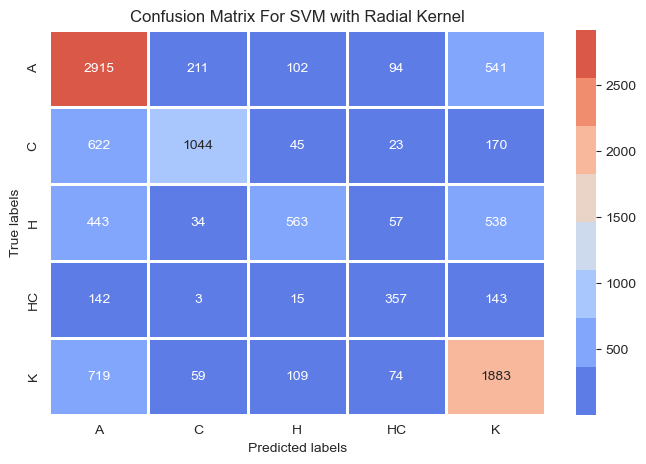

In [84]:
pred = svm.predict(X_test)
cm = confusion_matrix(y_test, pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap=sns.color_palette("coolwarm", 8), linewidths=1, linecolor='w');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix For SVM with Radial Kernel'); 
ax.xaxis.set_ticklabels(svm.classes_); 
ax.yaxis.set_ticklabels(svm.classes_);

In [85]:
for cls in range(cm.shape[0]):
    print(f'[Class {svm.classes_[cls]} vs others]')
    TP, FN, FP, TN = confusion_matrix_metrics(cls, cm).ravel()
    print(f'TP: {TP}, FN: {FN}, FP: {FP}, TN: {TN}')

[Class A vs others]
TP: 2915, FN: 948, FP: 1926, TN: 5117
[Class C vs others]
TP: 1044, FN: 860, FP: 307, TN: 8695
[Class H vs others]
TP: 563, FN: 1072, FP: 271, TN: 9000
[Class HC vs others]
TP: 357, FN: 303, FP: 248, TN: 9998
[Class K vs others]
TP: 1883, FN: 961, FP: 1392, TN: 6670


In [86]:
print(classification_report(y_test, pred,target_names=svm.classes_))

              precision    recall  f1-score   support

           A       0.60      0.75      0.67      3863
           C       0.77      0.55      0.64      1904
           H       0.68      0.34      0.46      1635
          HC       0.59      0.54      0.56       660
           K       0.57      0.66      0.62      2844

    accuracy                           0.62     10906
   macro avg       0.64      0.57      0.59     10906
weighted avg       0.64      0.62      0.61     10906



In [89]:
results = results.append({'Model': 'Support Vector Machine', 
                          'Parameters': svm[1],
                          'Train Score': svm_train_score,
                          'Test Score': svm_test_score
                         }, ignore_index=True)
results

Model  \
0  Logistic Regression                  
1  Decision Tree                        
2  Bagging Classifier (Decision tree)   
3  Random Forest                        
4  Gradient Boost                       
5  XG Boost                             
6  Support Vector Machine               

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Parameters  \
0  {'classifier__C': 10, 'classifier__multi_class': 'multinomial', 'classifier__penalty': 'l2'}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
1  {'ccp_alpha': 0.002, 'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_samples_split': 3}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
2  {'base_estimator__ccp_alpha': 0.002, 'base_estimator__max_depth': 5, 'base_estimator__max_leaf_nodes': 20, 'base_estimator__min_samples_leaf': 2, 'base_estimator__min_samples_split': 3, 'max_samples': 0.3, 'n_estimators': 10}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
3  DecisionTreeClassifier(ccp_alpha=0.002, max_depth=5, max_features='sqrt',\n                       max_leaf_nodes=20, min_samples_leaf=2,\n                       min_samples_split=3, random_state=1608637542)                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [97]:
results['Train Score'] = results['Train Score'].round(2)
results['Test Score'] = results['Test Score'].round(2)
results

Model  \
0  Logistic Regression                  
1  Decision Tree                        
2  Bagging Classifier (Decision tree)   
3  Random Forest                        
4  Gradient Boost                       
5  XG Boost                             
6  Support Vector Machine               

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Parameters  \
0  {'classifier__C': 10, 'classifier__multi_class': 'multinomial', 'classifier__penalty': 'l2'}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
1  {'ccp_alpha': 0.002, 'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_samples_split': 3}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
2  {'base_estimator__ccp_alpha': 0.002, 'base_estimator__max_depth': 5, 'base_estimator__max_leaf_nodes': 20, 'base_estimator__min_samples_leaf': 2, 'base_estimator__min_samples_split': 3, 'max_samples': 0.3, 'n_estimators': 10}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
3  DecisionTreeClassifier(ccp_alpha=0.002, max_depth=5, max_features='sqrt',\n                       max_leaf_nodes=20, min_samples_leaf=2,\n                       min_samples_split=3, random_state=1608637542)                                                                                                                                                                                                                                                                                                                                                                                                                                                          

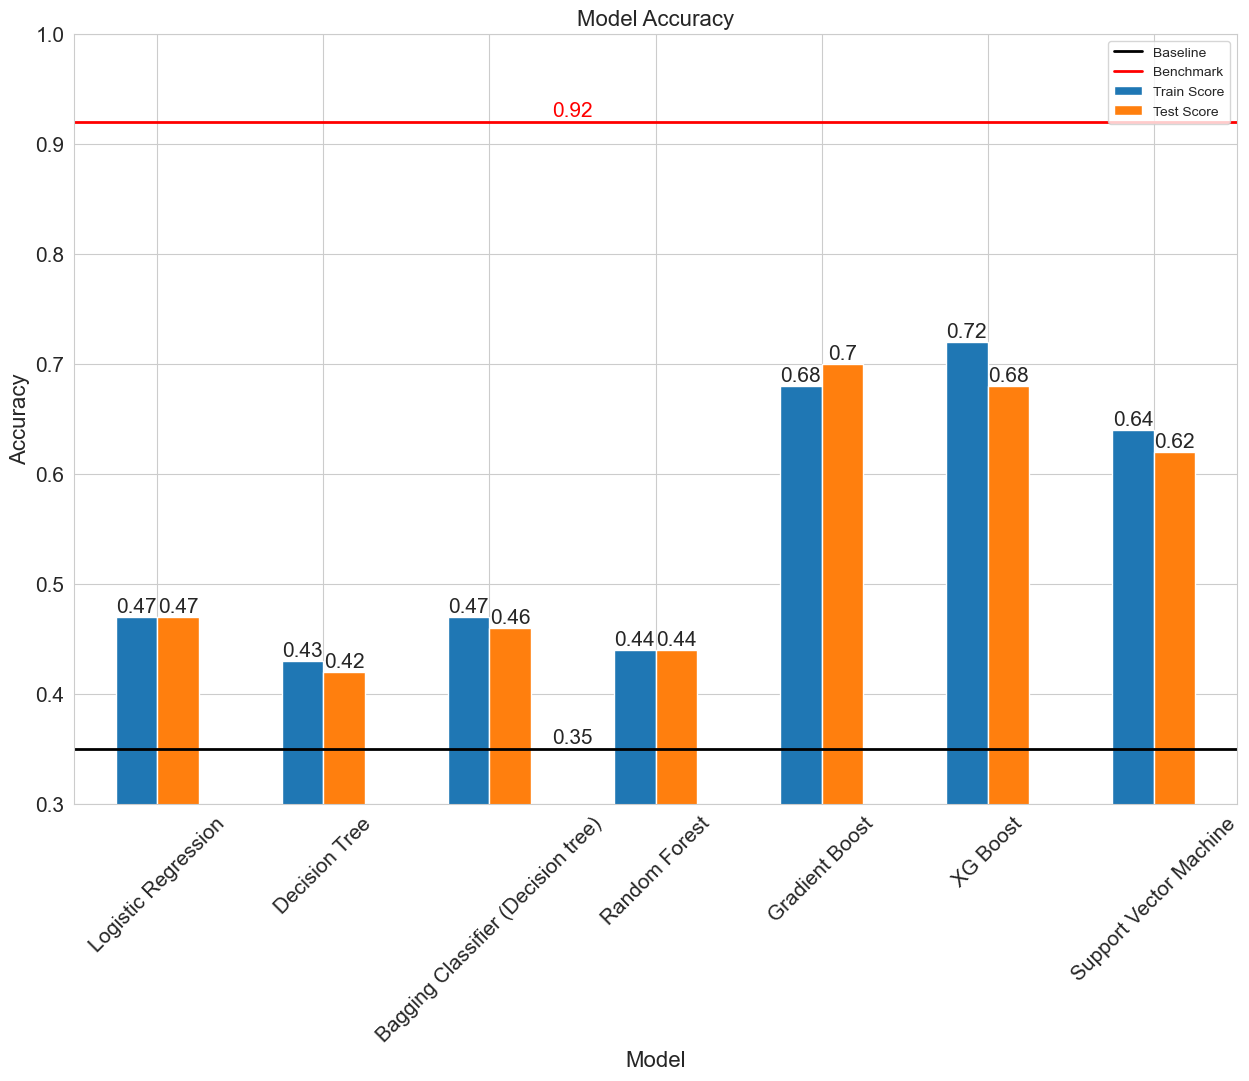

In [130]:
ax = results.plot.bar(x='Model', rot=45, figsize=(15,10), fontsize=15)
plt.title('Model Accuracy', fontsize=16)
plt.xlabel('Model', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([0.3,1])

# annotate
ax.bar_label(ax.containers[0], label_type='edge', fontsize=15)
ax.bar_label(ax.containers[1], label_type='edge', fontsize=15)

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)

# add horizontal lines for baseline and benchmark models
ax.axhline(y=0.35, linewidth=2, color='black', label = 'Baseline')
plt.text(2.5, 0.36, '0.35', fontsize=15, va='center', ha='center')
ax.axhline(y=0.92, linewidth=2, color='r', label = 'Benchmark')
plt.text(2.5, 0.93, '0.92', fontsize=15, va='center', ha='center',color='r')
plt.legend(loc='upper right')